<a href="https://colab.research.google.com/github/tempzeba/iot_test_public/blob/main/A1L02002_log_20201119_(DNN_tensorflow2_0)_Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0) 程式說明
### 目的：A1L02001 IOT異常分析
### 運行環境：

In [112]:
import sys
print("python版本:%s"% sys.version)

python版本:3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]


In [113]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

## 1) 載入資料集

In [114]:
# df_train = pd.read_csv('./data/Iris.csv')
df_train = pd.read_csv('https://github.com/tempzeba/iot_test_public/releases/download/iot_data/A1L02001_log_01.csv', sep='\t')
df_train = df_train.drop(labels=[r'收集日期', 
r'抽樣秒', 
r'位址區段E32768紀錄時間', 
r'位址區段G32768紀錄時間', 
r'位址區段G12288紀錄時間',
r'機台編號',
r'目前生產配方'
,
 '壓力檢測啟動',
 'Cycle_Time',
 '第一穴預吹延遲',
 '第二穴預吹延遲',
 '第三穴預吹延遲',
 '第四穴預吹延遲',
 '第五穴預吹延遲',
 '第六穴預吹延遲',
 '第七穴預吹延遲',
 '第八穴預吹延遲',
 '第九穴預吹延遲',
 '第十穴預吹延遲',
 '第一穴高壓延遲',
 '第二穴高壓延遲',
 '第三穴高壓延遲',
 '第四穴高壓延遲',
 '第五穴高壓延遲',
 '第六穴高壓延遲',
 '第七穴高壓延遲',
 '第八穴高壓延遲',
 '第九穴高壓延遲',
 '第十穴高壓延遲',
 '第一穴吹高壓時間',
 '第二穴吹高壓時間',
 '第三穴吹高壓時間',
 '第四穴吹高壓時間',
 '第五穴吹高壓時間',
 '第六穴吹高壓時間',
 '第七穴吹高壓時間',
 '第八穴吹高壓時間',
 '第九穴吹高壓時間',
 '第十穴吹高壓時間',
 '第一穴排氣時間',
 '第二穴排氣時間',
 '第三穴排氣時間',
 '第四穴排氣時間',
 '第五穴排氣時間',
 '第六穴排氣時間',
 '第七穴排氣時間',
 '第八穴排氣時間',
 '第九穴排氣時間',
 '第十穴排氣時間',
 '第九層燈管加熱%',
 '第十層燈管加熱%',
 '產能',
 '吹氣鼓風機轉速',
 '吸氣鼓風機轉速',
 '自轉馬達轉速',
 '整列滾筒調速',
 '牙口鼓風機轉速',
 '入胚啟動位置',
 '入胚啟動延時',
 '震動馬達震動時間',
 '震動馬達震動循環時間',
 '第九穴壓力檢測',
 '第十穴壓力檢測',
#  '破瓶數增加',
 '入胚啟動',
 '加熱啟動',
 '吹瓶啟動',
 '機台異常或無異常',
 '自動或手動',
 '總生產數量',
 '機台是否正常(0~59s)'

],axis=1) 

# 調整資料集
# 1. 只取有異常部分
# 2. 計算有異常資料筆數
# 3. 從無異常資料隨機抽出k筆資料與異常資料合併作為投入模型的資料集。k=異常資料筆數
mask = df_train[r'異常代碼'] > 0
target_count = mask.sum()
df_train_noerr = df_train[df_train[r'異常代碼'] == 0].sample(n=target_count,random_state=123,axis=0)
df_train = df_train[mask]
df_train = df_train.append(df_train_noerr)
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
低壓壓力,17460.0,8.210412,0.135866,7.8,8.1,8.2,8.3,8.8
高壓壓力,17460.0,31.243545,1.752345,22.5,30.5,31.7,32.6,33.9
回收壓力,17460.0,11.051403,0.457494,9.0,10.8,11.0,11.3,12.5
預吹壓力,17460.0,10.789055,0.548347,8.5,10.4,10.8,11.2,12.4
最多成型時間,17460.0,942.864891,2.564258,927.0,942.0,942.0,945.0,951.0
第一層燈管加熱%,17460.0,69.383763,2.161632,65.5,68.0,69.0,70.0,82.0
第二層燈管加熱%,17460.0,41.008906,0.337388,40.5,41.0,41.0,41.0,43.0
第三層燈管加熱%,17460.0,40.047365,0.303088,40.0,40.0,40.0,40.0,42.0
第四層燈管加熱%,17460.0,40.070332,0.452677,40.0,40.0,40.0,40.0,43.0
第五層燈管加熱%,17460.0,45.464834,0.669276,44.0,45.0,45.0,46.0,47.0


## 2) 手動編碼
處理名目資料 (Nominal variables) - 資料前處理
依據特徵資料的特性，可以選擇手動編碼或自動編碼。

### 使用編碼時機?
進行深度學習時，神經網路只能處理數值資料。因此我們需要將所有非數字型態的特徵進行轉換。

### 註：
略。(IOT原始資料已經一次前處理)

## 3) 檢查缺失值
使用 numpy 所提供的函式來檢查是否有 NA 缺失值，假設有缺失值使用dropna()來移除。使用的時機在於當只有少量的缺失值適用，若遇到有大量缺失值的情況，或是本身的資料量就很少的情況下建議可以透過機器學習的方法補值來預測缺失值。
### 註：
略。(IOT原始資料已經一次前處理)

## 4) 將輸出特徵做one-hot encoding
如何對欄位class做one-hot encoding？

In [115]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(df_train[r'異常代碼'])
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 5) 切割訓練集與測試集

In [116]:
pd.set_option('max_row',300)
# X=df_train.drop(labels=['Class'],axis=1)
X=df_train.drop(columns=[r'異常代碼'])
# X.isna().sum().sum()
# X
mask = X.describe().transpose()['std']==0
X.describe().transpose()[mask].index.tolist()
# X.describe().transpose().columns.tolist()


[]

In [117]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=.3 , random_state=40)

In [118]:
print('訓練資料: ',X_train.shape)
print('測試資料: ',X_test.shape)
# X_train

訓練資料:  (12222, 33)
測試資料:  (5238, 33)


## 6) 建立網路模型

In [119]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.3.0


In [120]:
# 此範例使用 Tensorflow2.0 Sequential API 搭建神經網路。
model = Sequential()
model.add(Dense(8, Activation('relu'), input_dim=X.shape[-1]))
model.add(Dense(16, Activation('relu')))
model.add(Dense(193, Activation('softmax')))

In [121]:
model.summary()   # Weights = (4+1)*8+(8+1)*16+(16+1)*3

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 8)                 272       
_________________________________________________________________
dense_16 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_17 (Dense)             (None, 193)               3281      
Total params: 3,697
Trainable params: 3,697
Non-trainable params: 0
_________________________________________________________________


In [123]:
# 編譯模型
optim = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])

batch_size=1000
epochs = 50

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)


Epoch 1/50
11/11 [==============================] - 0s 21ms/step - loss: 1.1061 - acc: 0.6523 - val_loss: 0.9235 - val_acc: 0.6051
Epoch 2/50
11/11 [==============================] - 0s 6ms/step - loss: 0.7465 - acc: 0.7658 - val_loss: 0.7185 - val_acc: 0.7195
Epoch 3/50
11/11 [==============================] - 0s 8ms/step - loss: 0.6608 - acc: 0.8113 - val_loss: 0.6768 - val_acc: 0.7866
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 0.6499 - acc: 0.8318 - val_loss: 0.6477 - val_acc: 0.8414
Epoch 5/50
11/11 [==============================] - 0s 7ms/step - loss: 0.6349 - acc: 0.8413 - val_loss: 0.6502 - val_acc: 0.8250
Epoch 6/50
11/11 [==============================] - 0s 9ms/step - loss: 0.6303 - acc: 0.8440 - val_loss: 0.6438 - val_acc: 0.8316
Epoch 7/50
11/11 [==============================] - 0s 7ms/step - loss: 0.6250 - acc: 0.8467 - val_loss: 0.6458 - val_acc: 0.8332
Epoch 8/50
11/11 [==============================] - 0s 7ms/step - loss: 0.6214 - acc: 0.8

## 7) 觀察訓練結果

In [124]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs_ = range(1,len(acc)+1)

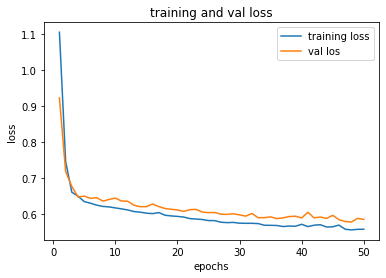

In [125]:
plt.plot(epochs_ , loss , label = 'training loss')
plt.plot(epochs_ , val_loss , label = 'val los')
plt.title('training and val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

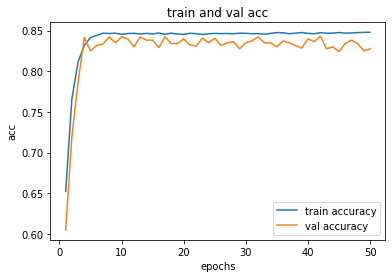

In [126]:
plt.clf()
plt.plot(epochs_ , acc , label='train accuracy')
plt.plot(epochs_ , val_acc , label = 'val accuracy')
plt.title('train and val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

## 8) 測試

In [127]:
from sklearn.metrics import accuracy_score
label=np.argmax(y,axis=1)
pred =  np.argmax(model.predict(X), axis=1)
# print(pred.shape)
print(accuracy_score(label, pred))
# print(y)

0.840893470790378


In [128]:
!pip install eli5

## 9) 檢查特徵重要性
> https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html
> https://www.mdeditor.tw/pl/pgi5/zh-tw

> 針對BlackBox模型或非sklearn模型，使用排列重要性方法


> 捨棄重要性低、增加損失的features特徵，重新建模訓練。


> 














In [129]:
# import numpy as np
from eli5.permutation_importance import get_score_importances

# ... load data, define score function
def score(X, y):
    y_pred = np.argmax(model.predict(X), axis=1)
    return accuracy_score(y, y_pred)

lab=np.argmax(y_train,axis=1)
base_score, score_decreases = get_score_importances(score, X_train.values, lab)
feature_importances = np.mean(score_decreases, axis=0)



In [130]:
# print(feature_importances)
feature_importance_dict = {}
for i, feature_name in enumerate(X.columns.values.tolist()) :
	feature_importance_dict[feature_name]=feature_importances[i]

# print(dict(sorted(feature_importance_dict.items(), key=lambda x:x[1],reverse=True)[:5]))
sorted_fi = dict(sorted(feature_importance_dict.items(), key=lambda x:x[1],reverse=True))
for name,i in sorted_fi.items():
  print(name, i)

第五穴壓力檢測 0.027736867943053523
第七穴壓力檢測 0.021894943544428114
加熱箱五水道溫度 0.002994599901816386
第八穴壓力檢測 0.0021600392734413276
最多成型時間 0.0014400261822942184
第一穴壓力檢測 0.001161839306169199
第六穴壓力檢測 0.0008836524300441795
加熱箱八水道溫度 0.0008672884961544725
高壓壓力 0.0005072819505809179
第三穴壓力檢測 0.0004090983472426757
加熱箱七水道溫度 0.0002945508100147265
第二層燈管加熱% 0.00013091147111765622
第三層燈管加熱% 4.909180166912108e-05
第四層燈管加熱% 1.6363933889707027e-05
回收壓力 0.0
破瓶數增加 0.0
低壓壓力 -3.2727867779414055e-05
預吹壓力 -3.2727867779414055e-05
破瓶數量 -0.00011454753722794919
第五層燈管加熱% -0.00013091147111765622
第七層燈管加熱% -0.00013091147111765622
破瓶壓力檢測值設定 -0.00013091147111765622
第六層燈管加熱% -0.0001800032727867773
第八層燈管加熱% -0.00021273114056619136
加熱箱二水道溫度 -0.000621829487808867
加熱箱四水道溫度 -0.0006545573555882811
加熱箱三水道溫度 -0.0008345606283750584
第一層燈管加熱% -0.0009000163639338865
滾筒速度 -0.0009327442317133006
加熱箱一水道溫度 -0.0009654720994927146
加熱箱六水道溫度 -0.0010963835706103708
第二穴壓力檢測 -0.0018654884634266011
第四穴壓力檢測 -0.002274586810669277
